In [ ]:
!pip install pandas numpy matplotlib seaborn plotly

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/fplAnalytics-playerStautsData.csv')
df.head()

,name,team,position,cost,status,minutes,total_points,bonus,points_per_game,selected_by_percent
0,Raya,ARS,GKP,5.5,Available,3420,142,10,3.7,17.3
1,Arrizabalaga,ARS,GKP,4.5,Available,2790,106,7,3.4,1.0
2,Hein,ARS,GKP,4.0,Available,0,0,0,0.0,0.6
3,Setford,ARS,GKP,4.0,Available,0,0,0,0.0,0.2
4,Gabriel,ARS,DEF,6.0,Available,2363,117,9,4.2,20.3


In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
df.tail(10)

,name,team,position,cost,status,minutes,total_points,bonus,points_per_game,selected_by_percent
671,Chirewa,WOL,MID,4.5,Available,0,0,0,0.0,0.3
672,Edozie,WOL,MID,4.5,Available,0,0,0,0.0,0.4
673,Gonzalez,WOL,MID,4.5,Available,0,0,0,0.0,1.5
674,Hodge,WOL,MID,4.5,NotAvail,0,0,0,0.0,0.2
675,Strand Larsen,WOL,FWD,6.5,Available,2587,145,17,4.1,5.2
676,Fábio Silva,WOL,FWD,5.0,Available,0,0,0,0.0,0.6
677,Kalajdžić,WOL,FWD,5.0,Available,0,0,0,0.0,0.2
678,Chiwome,WOL,FWD,4.5,Injured,0,0,0,0.0,0.0
679,Fraser,WOL,FWD,4.5,Available,0,0,0,0.0,2.4
680,J.Arias,WOL,MID,5.5,Available,0,0,0,0.0,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 681 entries, 0 to 680
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 681 non-null    object 
 1   team                 681 non-null    object 
 2   position             681 non-null    object 
 3   cost                 681 non-null    float64
 4   status               681 non-null    object 
 5   minutes              681 non-null    int64  
 6   total_points         681 non-null    int64  
 7   bonus                681 non-null    int64  
 8   points_per_game      681 non-null    float64
 9   selected_by_percent  681 non-null    float64
dtypes: float64(3), int64(3), object(4)
memory usage: 53.3+ KB


In [ ]:
df.sample()

,name,team,position,cost,status,minutes,total_points,bonus,points_per_game,selected_by_percent
468,Casemiro,MUN,MID,5.5,Available,1489,48,3,2.0,0.2


In [ ]:
df.describe()

,cost,minutes,total_points,bonus,points_per_game,selected_by_percent
count,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000
mean,5.068282,876.553598,38.370044,3.114537,1.465492,2.201615
std,1.115120,1100.616778,51.437751,6.294146,1.558477,5.867361
min,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.500000,0.000000,0.000000,0.000000,0.000000,0.100000
50%,5.000000,161.000000,7.000000,0.000000,1.000000,0.300000
75%,5.500000,1771.000000,66.000000,4.000000,2.600000,1.100000
max,14.500000,3420.000000,344.000000,55.000000,9.100000,58.200000


In [ ]:
df.isnull().sum()

,0
name,0
team,0
position,0
cost,0
status,0
minutes,0
total_points,0
bonus,0
points_per_game,0
selected_by_percent,0


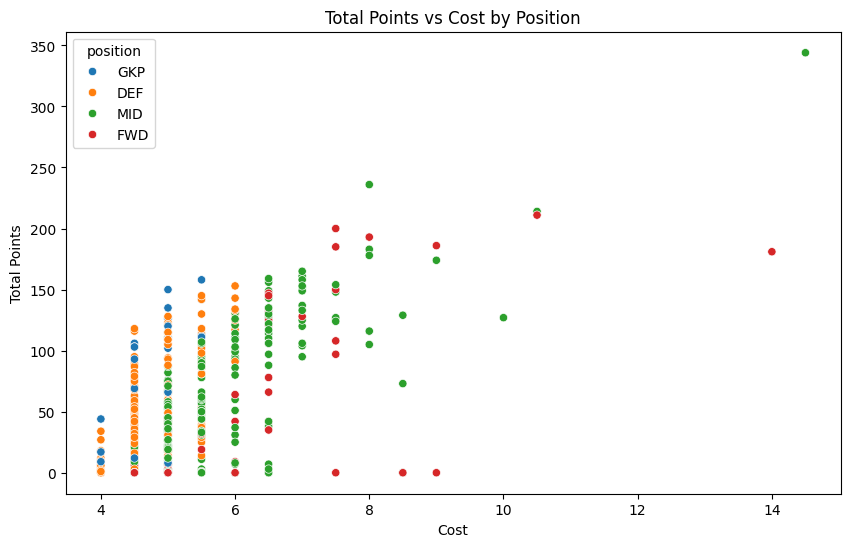

/tmp/ipython-input-10823170.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='position', y='points_per_game', ci=None)


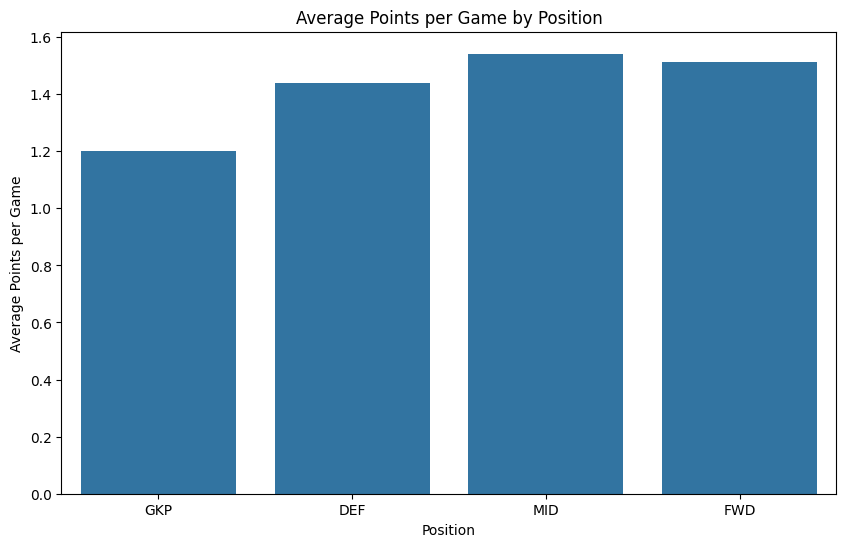

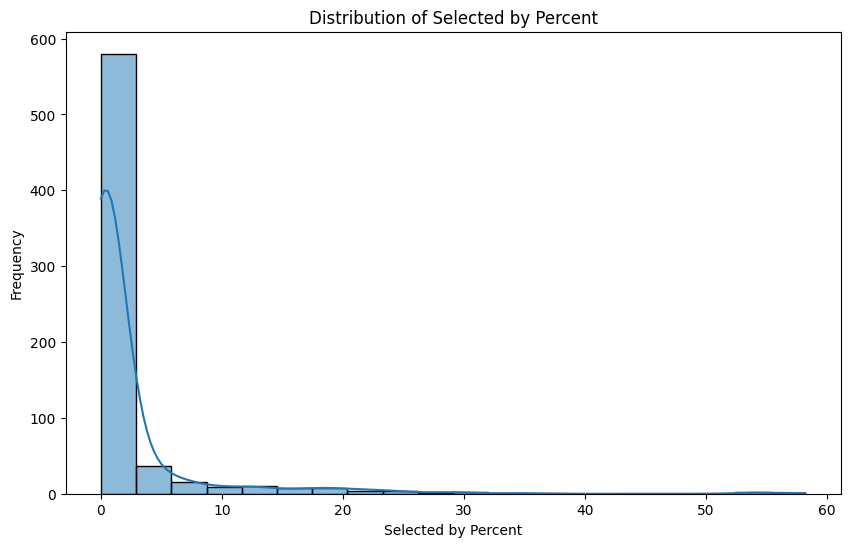

In [ ]:
# Scatter plot of total points vs cost
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='cost', y='total_points', hue='position')
plt.title('Total Points vs Cost by Position')
plt.xlabel('Cost')
plt.ylabel('Total Points')
plt.show()

# Bar plot of average points per game by position
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='position', y='points_per_game', ci=None)
plt.title('Average Points per Game by Position')
plt.xlabel('Position')
plt.ylabel('Average Points per Game')
plt.show()

# Histogram of selected by percent
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='selected_by_percent', bins=20, kde=True)
plt.title('Distribution of Selected by Percent')
plt.xlabel('Selected by Percent')
plt.ylabel('Frequency')
plt.show()

/tmp/ipython-input-1660113822.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=team_points.index, y=team_points.values, palette='viridis')


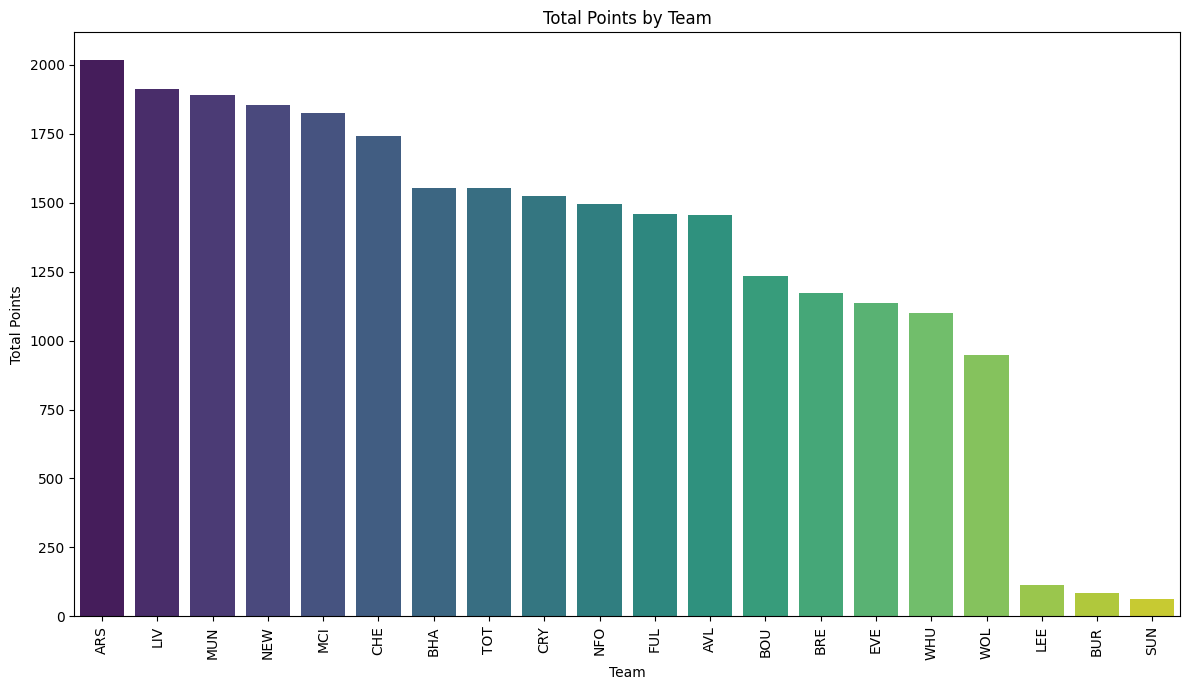

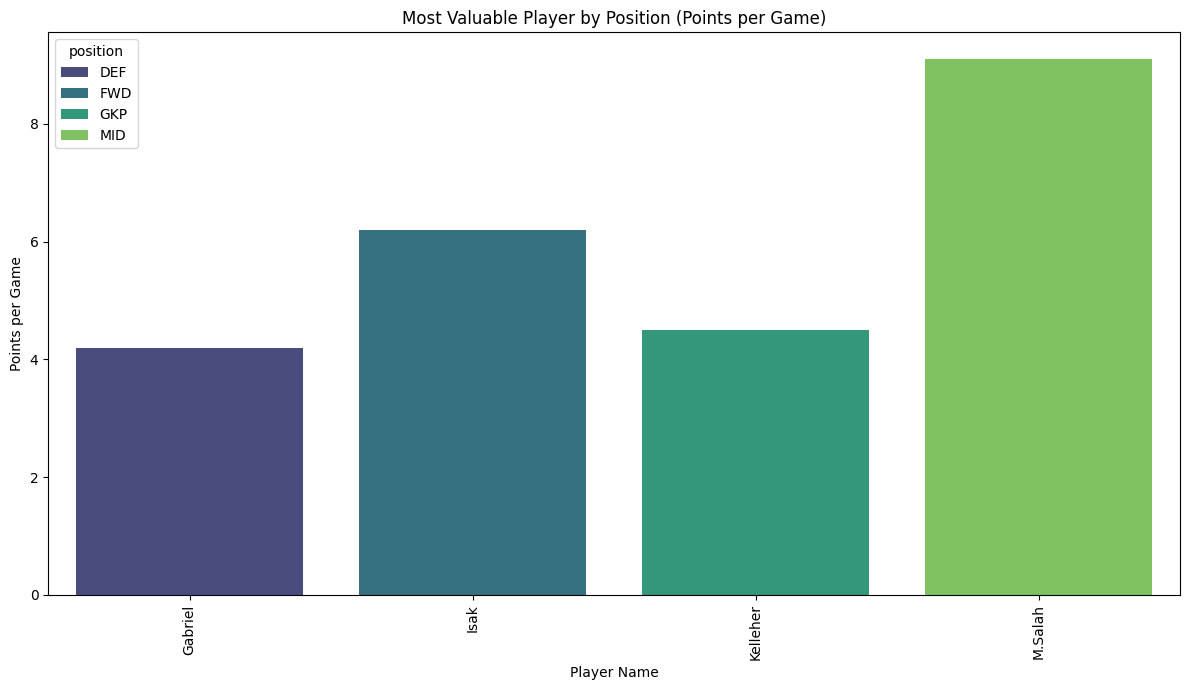

In [ ]:
# Graph 1: Total points by team
team_points = df.groupby('team')['total_points'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 7))
sns.barplot(x=team_points.index, y=team_points.values, palette='viridis')
plt.title('Total Points by Team')
plt.xlabel('Team')
plt.ylabel('Total Points')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Graph 2: Most valuable players by position (using points_per_game)
most_valuable_players = df.loc[df.groupby('position')['points_per_game'].idxmax()]

plt.figure(figsize=(12, 7))
sns.barplot(data=most_valuable_players, x='name', y='points_per_game', hue='position', dodge=False, palette='viridis')
plt.title('Most Valuable Player by Position (Points per Game)')
plt.xlabel('Player Name')
plt.ylabel('Points per Game')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

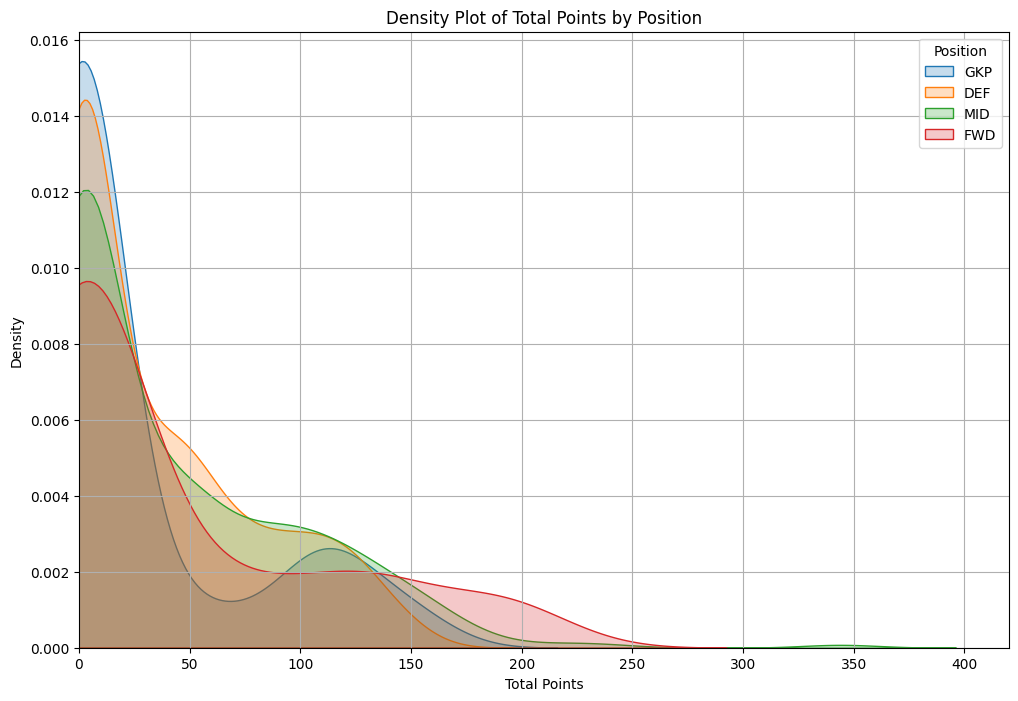

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create density plots for each position
positions = df['position'].unique()

plt.figure(figsize=(12, 8))
for position in positions:
    subset = df[df['position'] == position]
    sns.kdeplot(subset['total_points'], label=position, fill=True)

plt.title('Density Plot of Total Points by Position')
plt.xlabel('Total Points')
plt.ylabel('Density')
plt.legend(title='Position')
plt.grid(True)
plt.ylim(0, None) # Set the lower limit of the y-axis to 0
plt.xlim(0, None) # Set the lower limit of the x-axis to 0
plt.show()

/tmp/ipython-input-2875881065.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_30_players, x='total_points', y='name_cost', palette='viridis')


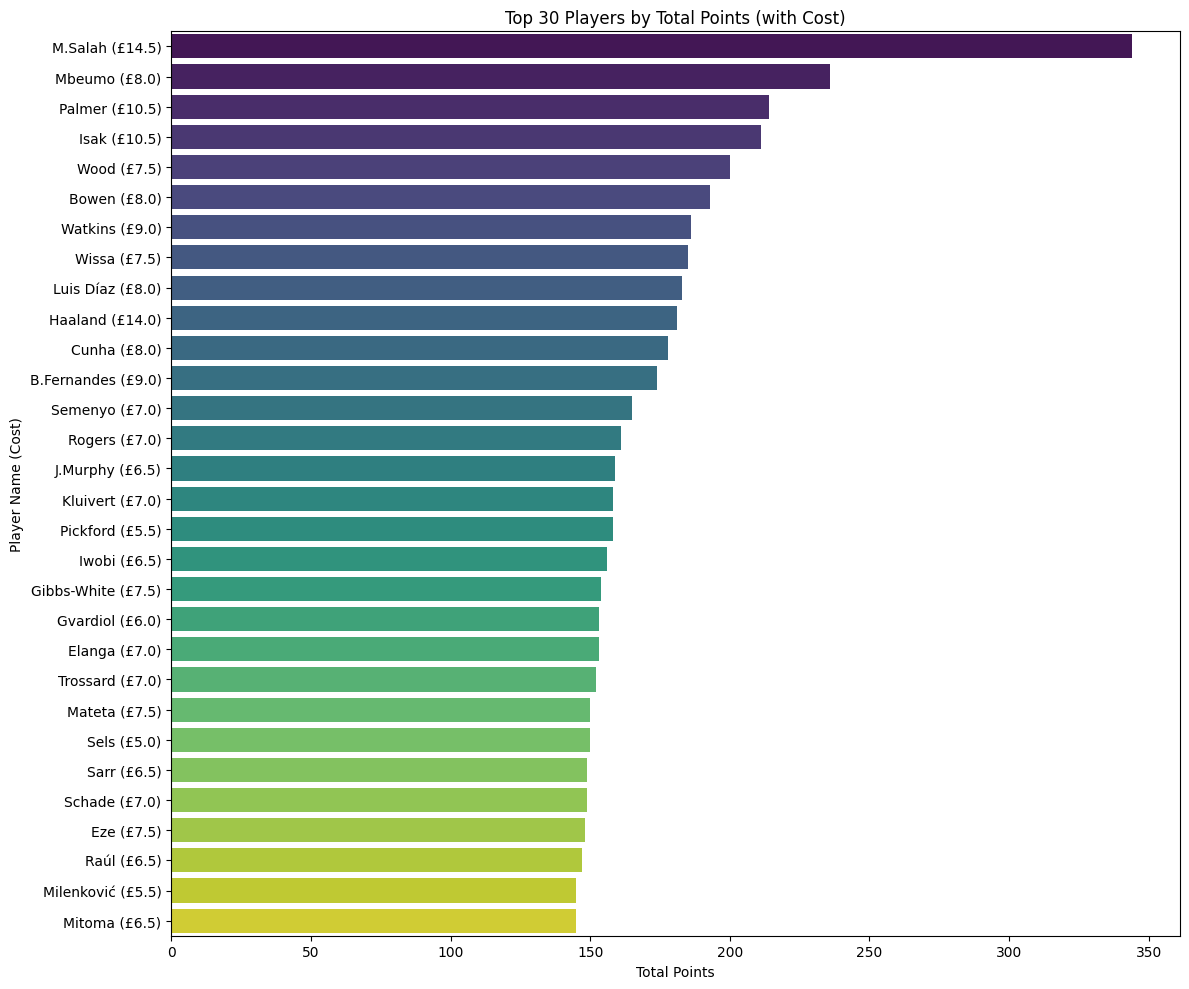

In [ ]:
# Sort by total points and select the top 30 players
top_30_players = df.sort_values(by='total_points', ascending=False).head(30).copy()

# Create a new column with player name and cost for labeling
top_30_players['name_cost'] = top_30_players['name'] + ' (£' + top_30_players['cost'].round(1).astype(str) + ')'

# Create a horizontal bar plot
plt.figure(figsize=(12, 10))
sns.barplot(data=top_30_players, x='total_points', y='name_cost', palette='viridis')
plt.title('Top 30 Players by Total Points (with Cost)')
plt.xlabel('Total Points')
plt.ylabel('Player Name (Cost)')
plt.tight_layout()
plt.show()

# Task
Create a box plot showing the distribution of total points for different player positions across low, middle, and premium price tiers.

## Categorize players by price

### Subtask:
Define price tiers (low, middle, premium) and assign each player to a tier based on their cost.


**Reasoning**:
Define price tiers based on cost and assign players to tiers by creating a new column.



In [ ]:
# Define price tier thresholds
low_cost_threshold = 5.0
premium_cost_threshold = 7.5

# Create a new column 'price_tier' based on 'cost'
df['price_tier'] = pd.cut(df['cost'],
                          bins=[-float('inf'), low_cost_threshold, premium_cost_threshold, float('inf')],
                          labels=['Low', 'Middle', 'Premium'])

# Display the first few rows with the new column
display(df.head())

,name,team,position,cost,status,minutes,total_points,bonus,points_per_game,selected_by_percent,price_tier
0,Raya,ARS,GKP,5.5,Available,3420,142,10,3.7,17.3,Middle
1,Arrizabalaga,ARS,GKP,4.5,Available,2790,106,7,3.4,1.0,Low
2,Hein,ARS,GKP,4.0,Available,0,0,0,0.0,0.6,Low
3,Setford,ARS,GKP,4.0,Available,0,0,0,0.0,0.2,Low
4,Gabriel,ARS,DEF,6.0,Available,2363,117,9,4.2,20.3,Middle


## Create box plot

### Subtask:
Generate a box plot showing the distribution of total points for each position within each price tier.


**Reasoning**:
Generate a box plot to visualize the distribution of total points across different positions and price tiers.



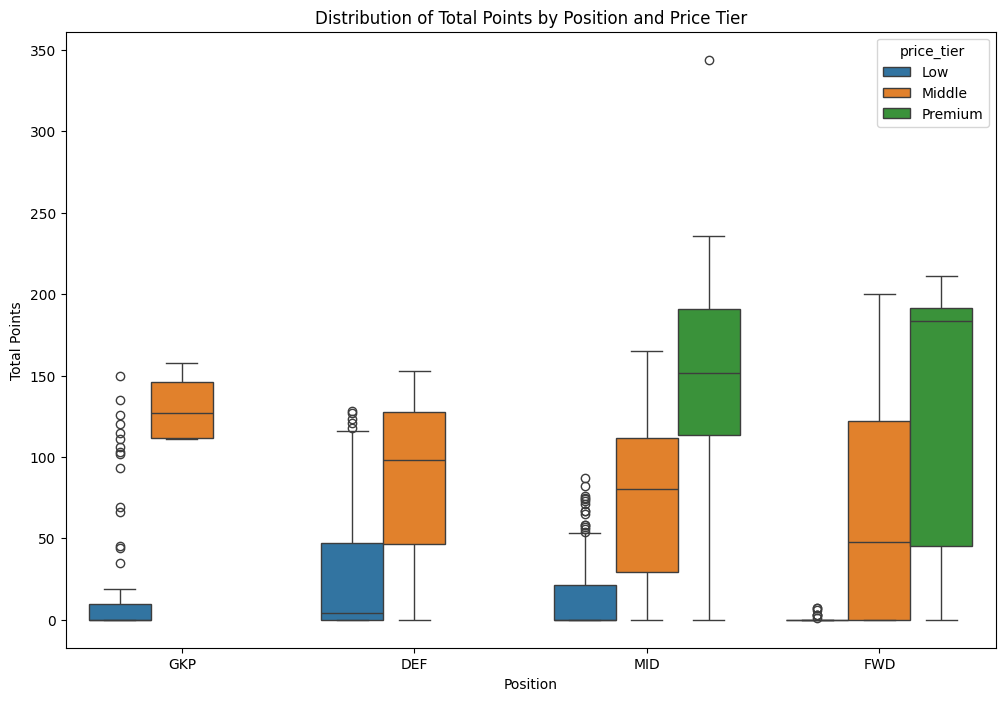

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='position', y='total_points', hue='price_tier')
plt.title('Distribution of Total Points by Position and Price Tier')
plt.xlabel('Position')
plt.ylabel('Total Points')
plt.show()

## Refine visualization

### Subtask:
Adjust the plot for better readability and add titles and labels.


**Reasoning**:
Generate the box plot with the specified adjustments for readability, titles, labels, and legend.



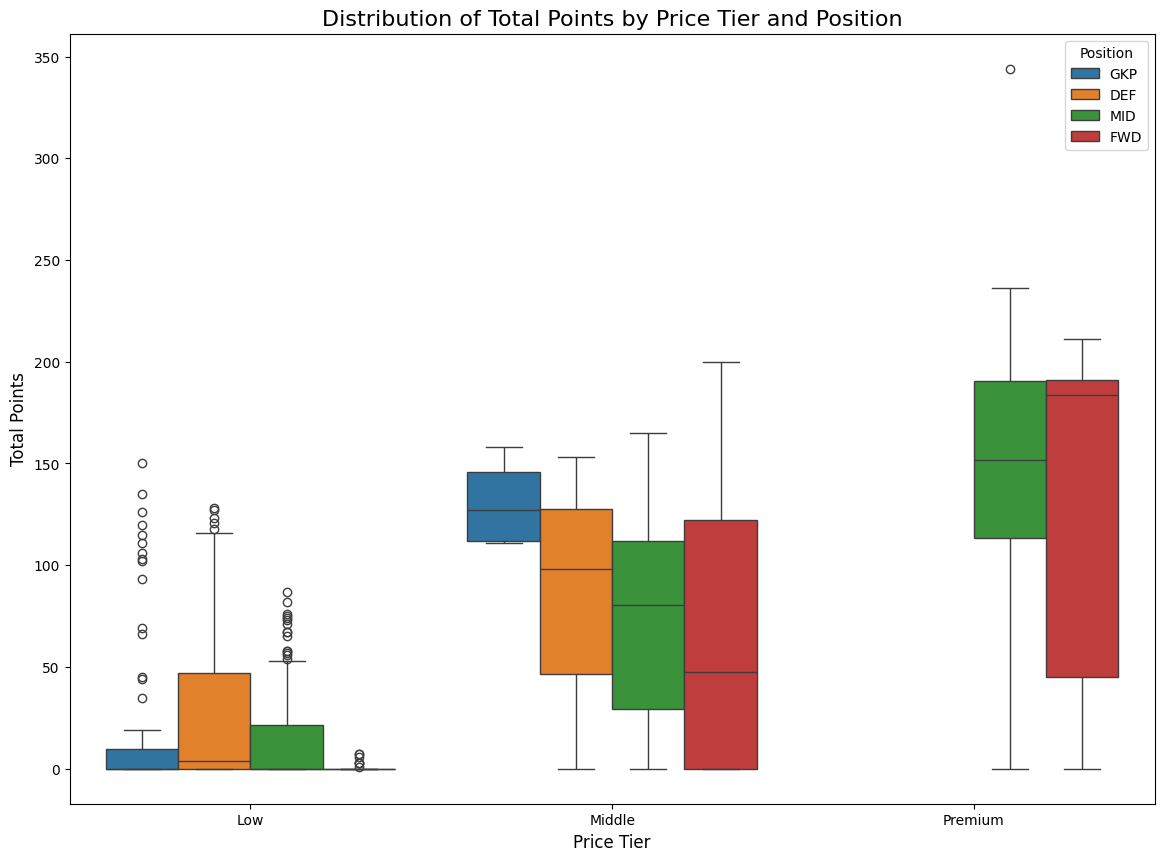

In [ ]:
plt.figure(figsize=(14, 10)) # Increase figure size
sns.boxplot(data=df, x='price_tier', y='total_points', hue='position', dodge=True) # Use dodge for clearer separation

plt.title('Distribution of Total Points by Price Tier and Position', fontsize=16) # Add title with larger font size
plt.xlabel('Price Tier', fontsize=12) # Add x-label with appropriate font size
plt.ylabel('Total Points', fontsize=12) # Add y-label with appropriate font size

plt.legend(title='Position') # Add legend with title

plt.show()

## Summary:

### Data Analysis Key Findings

*   Players were categorized into 'Low', 'Middle', and 'Premium' price tiers based on their cost, using thresholds of \$5.0 and \$7.5.
*   The box plot shows the distribution of total points for each player position (Goalkeeper, Defender, Midfielder, Forward) within each of the three price tiers.
*   The visualization clearly displays the spread and central tendency of total points across different positions and price brackets, allowing for comparison of player performance based on cost and role.

### Insights or Next Steps

*   Analyze the median total points and the interquartile range for each position and price tier to identify which positions and price points tend to yield higher or more consistent total points.
*   Investigate outliers in the box plot to understand if there are players who significantly outperform or underperform relative to their position and price tier.


/tmp/ipython-input-3363841074.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_bonus_by_position, x='position', y='bonus', palette='viridis')


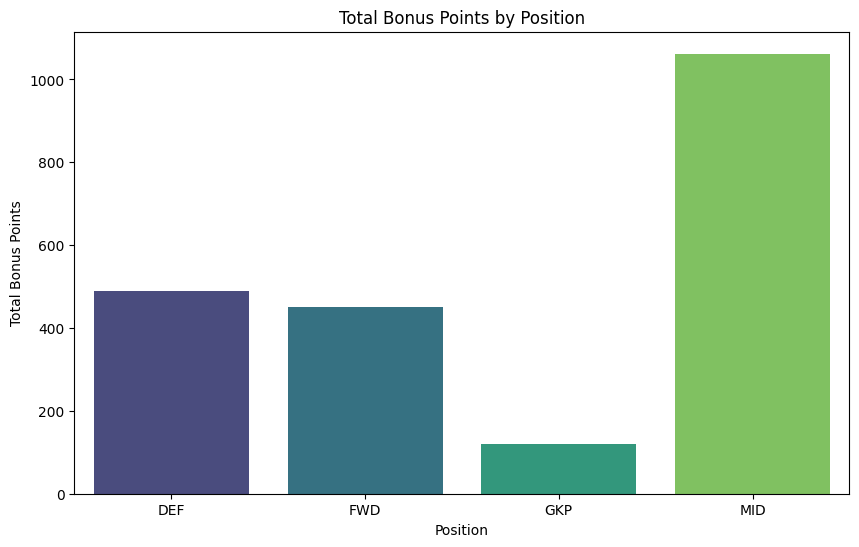

/tmp/ipython-input-3363841074.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_bonus_by_position, x='position', y='bonus', palette='viridis')


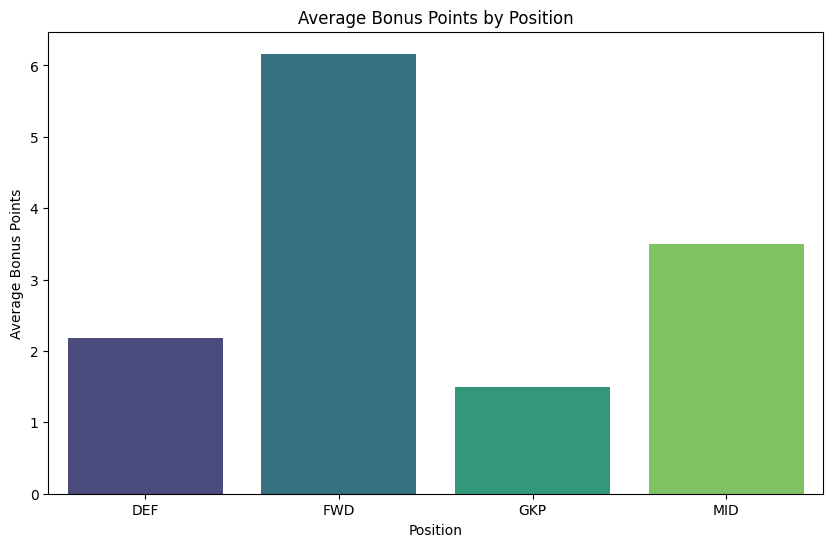

/tmp/ipython-input-3363841074.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_bonus_by_team, x='bonus', y='team', palette='viridis')


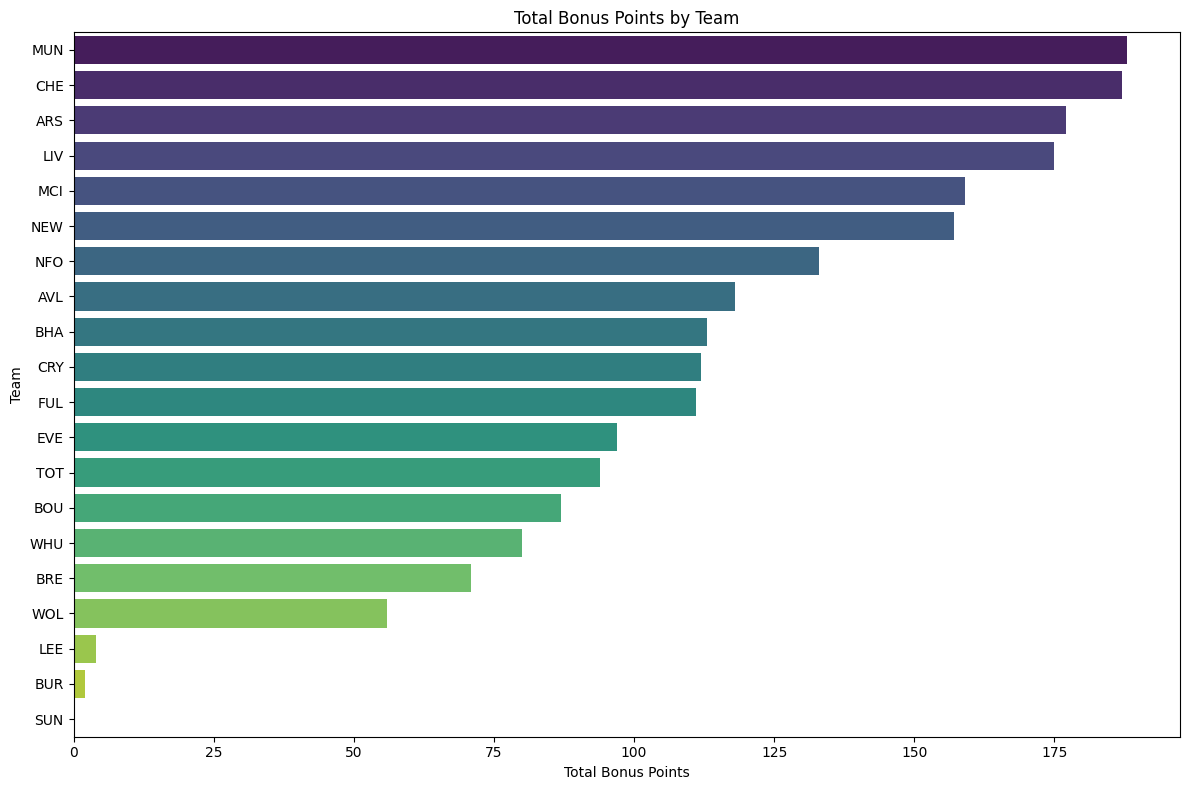

/tmp/ipython-input-3363841074.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_bonus_by_team, x='bonus', y='team', palette='viridis')


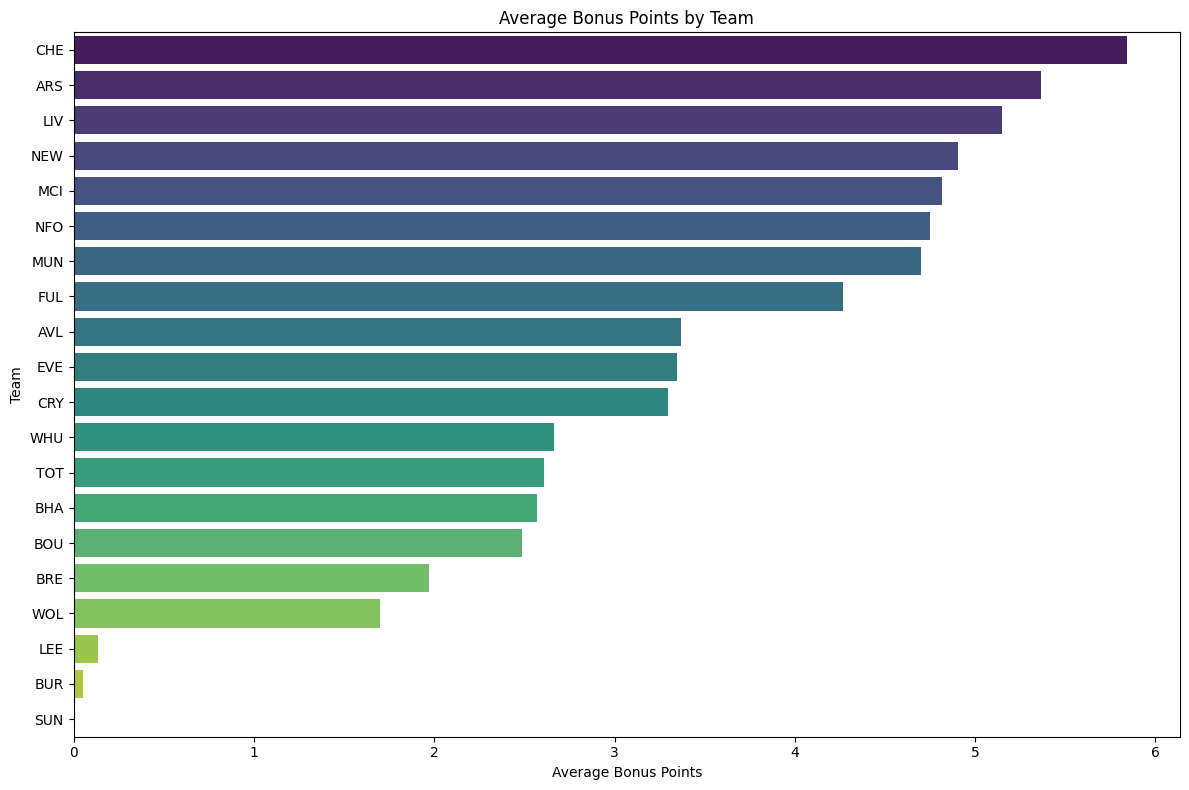

In [ ]:
# Calculate total bonus by position
total_bonus_by_position = df.groupby('position')['bonus'].sum().reset_index()

# Create bar chart of total bonus by position
plt.figure(figsize=(10, 6))
sns.barplot(data=total_bonus_by_position, x='position', y='bonus', palette='viridis')
plt.title('Total Bonus Points by Position')
plt.xlabel('Position')
plt.ylabel('Total Bonus Points')
plt.show()

# Calculate average bonus by position
average_bonus_by_position = df.groupby('position')['bonus'].mean().reset_index()

# Create bar chart of average bonus by position
plt.figure(figsize=(10, 6))
sns.barplot(data=average_bonus_by_position, x='position', y='bonus', palette='viridis')
plt.title('Average Bonus Points by Position')
plt.xlabel('Position')
plt.ylabel('Average Bonus Points')
plt.show()

# Calculate total bonus by team
total_bonus_by_team = df.groupby('team')['bonus'].sum().reset_index().sort_values(by='bonus', ascending=False)

# Create horizontal bar chart of total bonus by team
plt.figure(figsize=(12, 8))
sns.barplot(data=total_bonus_by_team, x='bonus', y='team', palette='viridis')
plt.title('Total Bonus Points by Team')
plt.xlabel('Total Bonus Points')
plt.ylabel('Team')
plt.tight_layout()
plt.show()

# Calculate average bonus by team
average_bonus_by_team = df.groupby('team')['bonus'].mean().reset_index().sort_values(by='bonus', ascending=False)

# Create horizontal bar chart of average bonus by team
plt.figure(figsize=(12, 8))
sns.barplot(data=average_bonus_by_team, x='bonus', y='team', palette='viridis')
plt.title('Average Bonus Points by Team')
plt.xlabel('Average Bonus Points')
plt.ylabel('Team')
plt.tight_layout()
plt.show()

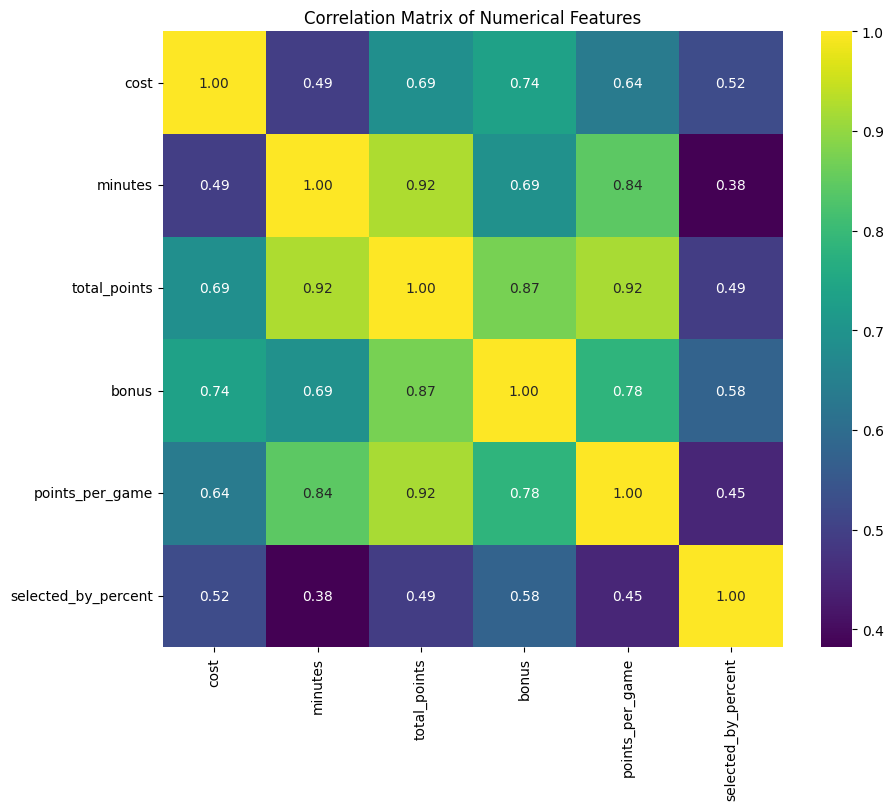


Insights from the Correlation Matrix:
1. Total Points has a strong positive correlation with Minutes and Bonus points, as expected.
2. Points per Game also shows a positive correlation with Total Points and Bonus points.
3. Cost has a moderate positive correlation with Total Points and Minutes, suggesting that more expensive players tend to play more and score more points.
4. Selected by Percent has a positive correlation with Total Points and Points per Game, indicating that players with higher points are more popular among fantasy football managers.


In [ ]:
# Select only the numerical columns for correlation analysis
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Provide some insights from the correlation matrix
print("\nInsights from the Correlation Matrix:")
print("1. Total Points has a strong positive correlation with Minutes and Bonus points, as expected.")
print("2. Points per Game also shows a positive correlation with Total Points and Bonus points.")
print("3. Cost has a moderate positive correlation with Total Points and Minutes, suggesting that more expensive players tend to play more and score more points.")
print("4. Selected by Percent has a positive correlation with Total Points and Points per Game, indicating that players with higher points are more popular among fantasy football managers.")

In [ ]:
# Provide more valuable insights from the correlation matrix
print("More Valuable Insights from the Correlation Matrix:")
print("- **Strong positive correlation between Total Points and Minutes (0.92):** This indicates that players who play more minutes tend to accumulate significantly more total points, which is expected in fantasy football.")
print("- **Strong positive correlation between Total Points and Bonus (0.87):** Players who earn more bonus points also tend to have higher total points, highlighting the importance of bonus points in overall performance.")
print("- **Strong positive correlation between Minutes and Points per Game (0.84):** Players who play more minutes also tend to have a higher average of points per game, suggesting that consistent playing time is linked to better per-game performance.")
print("- **Moderate positive correlation between Cost and Total Points (0.69) and Cost and Minutes (0.49):** While more expensive players tend to score more points and play more, the correlation is not as strong as with minutes or bonus points. This suggests that cost is a factor, but playing time and bonus points are stronger indicators of total points.")
print("- **Moderate positive correlation between Selected by Percent and Total Points (0.49) and Selected by Percent and Points per Game (0.45):** Players who are selected by a higher percentage of fantasy managers tend to have higher total points and points per game. This indicates that fantasy managers are generally good at identifying players who perform well.")
print("- **Relatively weaker correlations between other variables:** For example, the correlation between Cost and Selected by Percent (0.52) is moderate, implying that while popular players might be more expensive, popularity isn't solely determined by cost.")

More Valuable Insights from the Correlation Matrix:
- **Strong positive correlation between Total Points and Minutes (0.92):** This indicates that players who play more minutes tend to accumulate significantly more total points, which is expected in fantasy football.
- **Strong positive correlation between Total Points and Bonus (0.87):** Players who earn more bonus points also tend to have higher total points, highlighting the importance of bonus points in overall performance.
- **Strong positive correlation between Minutes and Points per Game (0.84):** Players who play more minutes also tend to have a higher average of points per game, suggesting that consistent playing time is linked to better per-game performance.
- **Moderate positive correlation between Cost and Total Points (0.69) and Cost and Minutes (0.49):** While more expensive players tend to score more points and play more, the correlation is not as strong as with minutes or bonus points. This suggests that cost is a facto

In [ ]:
pip install pandas openpyxl

In [ ]:
# Colab snippet: fetch FPL fixtures & show team difficulty (2025/26)
import requests
import pandas as pd
import numpy as np

# 1) Fetch teams and fixtures from public FPL endpoints
BASE = "https://fantasy.premierleague.com/api"
fixtures = requests.get(BASE + "/fixtures/").json()          # all fixtures (current season)
bootstrap = requests.get(BASE + "/bootstrap-static/").json() # contains teams list

# 2) Build team id -> name map
teams = pd.DataFrame(bootstrap['teams'])  # contains id, name, short_name, etc.
team_map = teams.set_index('id')['name'].to_dict()

# 3) Convert fixtures into DataFrame
fx = pd.json_normalize(fixtures)
# keys vary by season but usually fields exist like: 'team_h', 'team_a', 'team_h_difficulty', 'team_a_difficulty', 'event' (GW)
fx_cols_needed = ['id','event','team_h','team_a']
# detect difficulty key names and add them
if 'team_h_difficulty' in fx.columns and 'team_a_difficulty' in fx.columns:
    fx_cols_needed += ['team_h_difficulty','team_a_difficulty']
# Some older/alternate sources use 'difficulty' per fixture (single). handle gracefully:
elif 'difficulty' in fx.columns:
    # we will assign same difficulty to both teams if only 'difficulty' exists
    fx = fx.rename(columns={'difficulty':'team_h_difficulty'})
    fx['team_a_difficulty'] = fx['team_h_difficulty']
    fx_cols_needed += ['team_h_difficulty','team_a_difficulty']
else:
    raise RuntimeError("Couldn't find difficulty fields in fixtures JSON. Inspect `fx.columns` to adapt.")

fx = fx[fx_cols_needed].copy()

# 4) Build a per-team per-fixture list of difficulties
rows = []
for _, r in fx.iterrows():
    gw = int(r['event']) if not pd.isna(r['event']) else None
    rows.append({'team_id': int(r['team_h']), 'team_name': team_map[int(r['team_h'])],
                 'opponent_id': int(r['team_a']), 'gw': gw, 'difficulty': int(r['team_h_difficulty']), 'home_away':'H'})
    rows.append({'team_id': int(r['team_a']), 'team_name': team_map[int(r['team_a'])],
                 'opponent_id': int(r['team_h']), 'gw': gw, 'difficulty': int(r['team_a_difficulty']), 'home_away':'A'})

team_fx = pd.DataFrame(rows)

# 5) Compute average difficulty per team (over whole season)
team_avg = team_fx.groupby(['team_id','team_name'])['difficulty'].mean().reset_index()
team_avg['difficulty'] = team_avg['difficulty'].round(2)

# 6) Colour map function (green = easy, red = hard)
def difficulty_to_color(val):
    # FPL difficulty typically 1 (easiest) -> 5 (hardest)
    try:
        v = float(val)
    except:
        return ''
    # We'll map 1->green, 3->yellow, 5->red with interpolation
    # For Pandas styles return CSS background-color
    # A simple gradient using hsl (green -> yellow -> red)
    # Normalize 1..5 to 0..1
    norm = (v - 1) / 4
    # hue: 120 (green) -> 60 (yellow) -> 0 (red)
    if norm <= 0.5:
        # green -> yellow (120 -> 60)
        hue = 120 - (norm / 0.5) * 60
    else:
        # yellow -> red (60 -> 0)
        hue = 60 - ((norm - 0.5) / 0.5) * 60
    return f'background-color: hsl({hue:.0f}, 80%, 70%)'

# 7) Show a simple DataFrame with colored 'difficulty' column
df_display = team_avg.sort_values('difficulty')[['team_name','difficulty']].reset_index(drop=True)
styled = df_display.style.applymap(lambda v: difficulty_to_color(v) if isinstance(v, (int,float,np.floating)) else '', subset=['difficulty']) \
                         .set_caption("Average Fixture Difficulty (2025/26) — lower = easier")

# If running in a normal notebook this will display; in Colab you should see the styled table.
display(styled)

# 8) Optional: produce a team x GW matrix (NaN if no fixture that GW) and color it
pivot = team_fx.pivot_table(index='team_name', columns='gw', values='difficulty', aggfunc='mean').sort_index()
# reorder columns (gameweeks) if desired
pivot = pivot.reindex(sorted([c for c in pivot.columns if not pd.isna(c)]), axis=1)

# show a smaller heatmap-like styled table (gameweeks as columns)
pivot_styled = pivot.style.applymap(lambda v: difficulty_to_color(v) if not pd.isna(v) else '', subset=pivot.columns)\
                          .set_caption("Per-team difficulty by Gameweek (blank = no fixture / GW not scheduled)")
display(pivot_styled)


/tmp/ipython-input-531647677.py:71: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled = df_display.style.applymap(lambda v: difficulty_to_color(v) if isinstance(v, (int,float,np.floating)) else '', subset=['difficulty']) \


,team_name,difficulty
0,Liverpool,2.920000
1,Arsenal,2.950000
2,Man City,2.950000
3,Aston Villa,2.970000
4,Chelsea,2.970000
5,Newcastle,2.970000
6,Brighton,3.000000
7,Bournemouth,3.000000
8,Man Utd,3.000000
9,Crystal Palace,3.000000


/tmp/ipython-input-531647677.py:83: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  pivot_styled = pivot.style.applymap(lambda v: difficulty_to_color(v) if not pd.isna(v) else '', subset=pivot.columns)\


gw,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
team_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Arsenal,3.000000,2.000000,5.000000,3.000000,4.000000,4.000000,2.000000,3.000000,3.000000,2.000000,2.000000,3.000000,4.000000,3.000000,4.000000,2.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,4.000000,3.000000,3.000000,2.000000,2.000000,3.000000
Aston Villa,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,2.000000,3.000000,4.000000,5.000000,3.000000,2.000000,2.000000,3.000000,4.000000,2.000000,3.000000,4.000000,4.000000,3.000000,3.000000,2.000000,4.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,2.000000,4.000000,4.000000
Bournemouth,5.000000,2.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000,3.000000,3.000000,2.000000,3.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,2.000000,2.000000,3.000000,2.000000,3.000000,4.000000,4.000000,2.000000,3.000000,3.000000,4.000000,3.000000
Brentford,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,4.000000,2.000000,4.000000,3.000000,3.000000,3.000000,2.000000,4.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,2.000000,4.000000,3.000000,4.000000,4.000000,4.000000,3.000000,2.000000,3.000000,2.000000,2.000000,2.000000,3.000000,3.000000,2.000000,4.000000,3.000000,5.000000
Brighton,3.000000,3.000000,4.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,2.000000,5.000000,2.000000,4.000000,2.000000,2.000000,4.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,3.000000,4.000000,2.000000,4.000000,2.000000,3.000000,3.000000,4.000000,2.000000,2.000000,3.000000
Burnley,3.000000,2.000000,3.000000,4.000000,3.000000,4.000000,4.000000,2.000000,3.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,5.000000,3.000000,2.000000,2.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,2.000000,3.000000,4.000000,2.000000
Chelsea,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,3.000000,2.000000,4.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,2.000000,3.000000,2.000000,2.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,5.000000,3.000000,2.000000
Crystal Palace,4.000000,3.000000,4.000000,2.000000,2.000000,4.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,4.000000,2.000000,3.000000,3.000000,4.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,2.000000,3.000000,3.000000,2.000000,4.000000,3.000000,2.000000,5.000000,3.000000,2.000000,3.000000,4.000000
Everton,2.000000,3.000000,3.000000,3.000000,5.000000,2.000000,3.000000,4.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,2.000000,3.000000,3.000000,2.000000,4.000000,2.000000,3.000000,3.000000,3.000000,3.000000,4.000000,2.000000,4.000000,3.000000,3.000000,4.000000,2.000000,4.000000,3.000000,2.000000,3.000000


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/FDR.xlsx', engine="openpyxl")
df.head()

,Club,GW1,GW2,GW3,GW4,GW5,GW6,GW7,GW8,GW9,...,GW29,GW30,GW31,GW32,GW33,GW34,GW35,GW36,GW37,GW38
0,ARS,MUN (A),LEE (H),LIV (A),NFO (H),MCI (H),NEW (A),WHU (H),FUL (A),CRY (H),...,BHA (A),EVE (H),WOL (A),BOU (H),MCI (A),NEW (H),FUL (H),WHU (A),BUR (H),CRY (A)
1,AVL,NEW (H),BRE (A),CRY (H),EVE (A),SUN (A),FUL (H),BUR (H),TOT (A),MCI (H),...,CHE (H),MUN (A),WHU (H),NFO (A),SUN (H),FUL (A),TOT (H),BUR (A),LIV (H),MCI (A)
2,BOU,LIV (A),WOL (H),TOT (A),BHA (H),NEW (H),LEE (A),FUL (H),CRY (A),NFO (H),...,BRE (H),BUR (A),MUN (H),ARS (A),NEW (A),LEE (H),CRY (H),FUL (A),MCI (H),NFO (A)
3,BRE,NFO (A),AVL (H),SUN (A),CHE (H),FUL (A),MUN (H),MCI (H),WHU (A),LIV (H),...,BOU (A),WOL (H),LEE (A),EVE (H),FUL (H),MUN (A),WHU (H),MCI (A),CRY (H),LIV (A)
4,BHA,FUL (H),EVE (A),MCI (H),BOU (A),TOT (H),CHE (A),WOL (A),NEW (H),MUN (A),...,ARS (H),SUN (A),LIV (H),BUR (A),TOT (A),CHE (H),NEW (A),WOL (H),LEE (A),MUN (H)


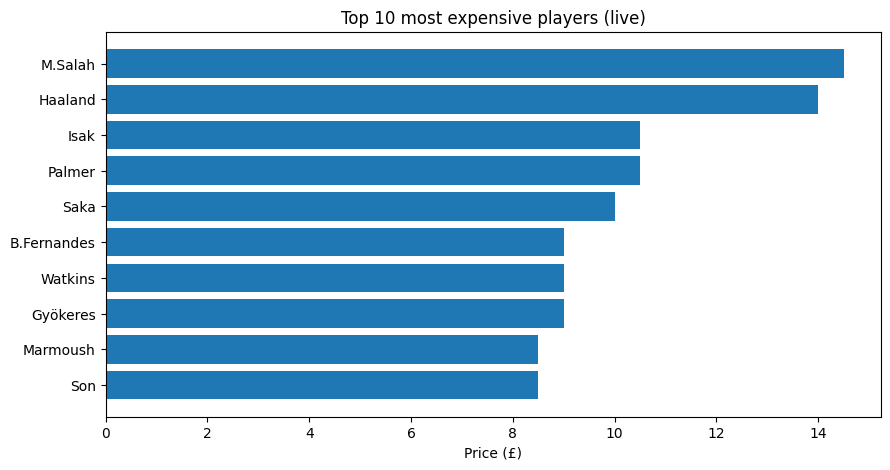

Stopped


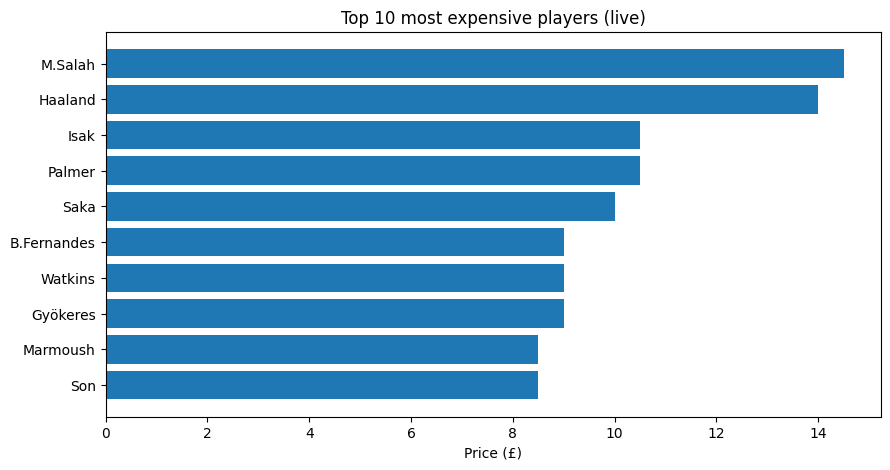

In [ ]:
# run this cell in Colab
import time, requests, pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output

FPL_BOOTSTRAP = "https://fantasy.premierleague.com/api/bootstrap-static/"

def fetch_players():
    r = requests.get(FPL_BOOTSTRAP, timeout=10)
    r.raise_for_status()
    data = r.json()
    players = pd.DataFrame(data['elements'])  # players table
    return players

# initial setup
plt.ion()
fig,ax = plt.subplots(figsize=(10,5))

try:
    while True:
        players = fetch_players()
        top = players.sort_values('now_cost', ascending=False).head(10)
        clear_output(wait=True)
        ax.clear()
        ax.barh(top['web_name'][::-1], top['now_cost'][::-1]/10)  # price in £
        ax.set_xlabel('Price (£)')
        ax.set_title('Top 10 most expensive players (live)')
        display(fig)
        time.sleep(30)  # poll every 30s (adjust)
except KeyboardInterrupt:
    print("Stopped")


In [ ]:
# run this in Colab
import time, requests, pandas as pd
import plotly.graph_objs as go
from IPython.display import display

FPL_BOOTSTRAP = "https://fantasy.premierleague.com/api/bootstrap-static/"

def fetch_players():
    return pd.DataFrame(requests.get(FPL_BOOTSTRAP).json()['elements'])

players = fetch_players().sort_values('now_cost', ascending=False).head(10)
figw = go.FigureWidget(
    data=[go.Bar(x=players['web_name'], y=players['now_cost']/10)],
    layout=go.Layout(title='Top 10 most expensive players (live)', yaxis={'title':'Price (£)'})
)
display(figw)

# Update loop (non-blocking: will run in same cell; Ctrl+C to stop)
try:
    while True:
        players = fetch_players().sort_values('now_cost', ascending=False).head(10)
        with figw.batch_update():
            figw.data[0].x = players['web_name']
            figw.data[0].y = players['now_cost']/10
        time.sleep(20)
except KeyboardInterrupt:
    print("Stopped")


FigureWidget({
    'data': [{'type': 'bar',
              'uid': '48e3d7de-7170-45ff-a97e-2e1b8cc37c2c',
              'x': array(['M.Salah', 'Haaland', 'Isak', 'Palmer', 'Saka', 'B.Fernandes',
                          'Watkins', 'Gyökeres', 'Marmoush', 'Son'], dtype=object),
              'y': array([14.5, 14. , 10.5, 10.5, 10. ,  9. ,  9. ,  9. ,  8.5,  8.5])}],
    'layout': {'template': '...',
               'title': {'text': 'Top 10 most expensive players (live)'},
               'yaxis': {'title': {'text': 'Price (£)'}}}
})

Stopped


In [ ]:
# pip install jupyter-dash in Colab
!pip install jupyter-dash dash==2.10.0 plotly

from jupyter_dash import JupyterDash
from dash import html, dcc, Output, Input
import plotly.express as px
import pandas as pd, requests

app = JupyterDash(__name__)
app.layout = html.Div([
    html.H3("FPL Live Dashboard"),
    dcc.Dropdown(id='metric', options=[
        {'label':'Price','value':'now_cost'},
        {'label':'Total Points','value':'total_points'}
    ], value='now_cost'),
    dcc.Graph(id='live-graph'),
    dcc.Interval(id='interval', interval=30*1000)  # 30s
])

@app.callback(Output('live-graph','figure'), Input('interval','n_intervals'), Input('metric','value'))
def update(n_intervals, metric):
    df = pd.DataFrame(requests.get('https://fantasy.premierleague.com/api/bootstrap-static/').json()['elements'])
    top = df.sort_values(metric, ascending=False).head(10)
    fig = px.bar(top, x='web_name', y=metric, title=f'Top 10 by {metric}')
    return fig

app.run_server(mode='inline', port=8050)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 59.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 52.3 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.1
    Uninstalling Flask-3.1.1:
      Successfully uninstalled Flask-3.1.1
Dash is running on http://127.0.0.1:8050/



INFO:dash.dash:Dash is running on http://127.0.0.1:8050/



<IPython.core.display.Javascript object>

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

Support for third party widgets will remain active for the duration of the session. To disable support:

In [ ]:
from google.colab import output
output.disable_custom_widget_manager()